In [1]:
import pandas as pd
import nltk
from nltk.tag.stanford import POSTagger
from nltk.stem.snowball import EnglishStemmer
import matplotlib.pyplot as plt
%matplotlib inline 
from nltk.corpus import stopwords
import compute_fleiss
import cPickle as pickle
import numpy as np

In [16]:
# st = POSTagger('../util/stanford-postagger-2014-08-27/models/english-left3words-distsim.tagger',\
#                '../util/stanford-postagger-2014-08-27/stanford-postagger-3.4.1.jar')

In [2]:
stemmer = EnglishStemmer()

In [3]:
f = '../data/sherlock_current_wtext.csv'

In [4]:
l = '/Users/jingy/Desktop/Data_Set_S1.txt'

In [11]:
# d1 = '/Users/jingy/Desktop/socal/adj_dictionary1.11.txt'
# d2 = '/Users/jingy/Desktop/socal/adv_dictionary1.11.txt'
# d3 = '/Users/jingy/Desktop/socal/int_dictionary1.11.txt'
# d4 = '/Users/jingy/Desktop/socal/noun_dictionary1.11.txt'
# d5 = '/Users/jingy/Desktop/socal/verb_dictionary1.11.txt'

In [12]:
# df_adj = pd.read_csv(d1, sep = '\t')
# df_adv = pd.read_csv(d2, sep = '\t')
# df_int = pd.read_csv(d3, sep = '\t')
# df_noun = pd.read_csv(d4, sep = '\t')
# df_verb = pd.read_csv(d5, sep = '\t')

In [13]:
# adj = dict(zip(df_adj[df_adj.columns[0]], df_adj[df_adj.columns[1]]))
# adv= dict(zip(df_adv[df_adv.columns[0]], df_adv[df_adv.columns[1]]))
# inte = dict(zip(df_int[df_int.columns[0]], df_int[df_int.columns[1]]))
# noun = dict(zip(df_noun[df_noun.columns[0]], df_noun[df_noun.columns[1]]))
# verb = dict(zip(df_verb[df_verb.columns[0]], df_verb[df_verb.columns[1]]))

In [5]:
d = pd.read_csv(l, sep = '\t')
labmit = dict(zip(d.word, d.happiness_average))

In [10]:
len(d)

10222

In [49]:
# def get_senti_score_socal(word):
#     try:
#         word_stem = stemmer.stem(word)
#         scores = []
#         scores.append(adj.get(word, None))
#         scores.append(adj.get(word_stem, None))
#         scores.append(adv.get(word, None))
#         scores.append(adv.get(word_stem, None))
#         scores.append(noun.get(word, None))
#         scores.append(noun.get(word_stem, None))
#         scores.append(verb.get(word, None))
#         scores.append(verb.get(word_stem, None))
#         scores = [i for i in scores if i is not None]
#         score = float(sum(scores))/len(scores) if len(scores) != 0 else None
#     except:
#         score = None
#     return score 

In [96]:
# def get_senti_score_labmit_stemming(word):
#     try:
#         word_stem = stemmer.stem(word)
#         scores = []
#         scores.append(labmit.get(word, None))
#         scores.append(labmit.get(word_stem, None))
#         scores = [i for i in scores if i != None]
#         if len(scores) == 2:
#             return np.average(scores)
#         elif len(scores) == 1:
#             return scores[0]
#         else:
#             return None
#     except:
#         return None

In [11]:
def get_senti_score_labmit(word):
    try:
        return labmit.get(word, None)
    except:
        return None

In [12]:
get_senti_score_labmit('laughter')

8.5

In [13]:
def create_text(df, character):
    works = []
    titles = df.Title.drop_duplicates()
    character = character.lower()
    for title in titles:
        text = df[df.Title == title].Text.tolist()
        
        #only consider sentences that only has 1 character.
        characters = list(set(df[df.Title == title].Characters.tolist()))    
        characters_list = []
        for name in characters:
            for part in str(name).split(' '):
                characters_list.append(part.replace(',', ''))
        characters_list = list(set(characters_list))
        characters_list = [i.lower() for i in characters_list if i != 'Sherlock' and i != 'Holmes' and i != ''] if characters_list != [] else []

        single_work = []
        for i in text:
            for j in str(i).split('.'):
                j = [k.replace(',', '').lower() for k in j.split(' ')]
                if characters_list != []:
                    if character in j and [c not in j for c in characters_list]:
                        single_work.append(j)
                else:
                    if character in j:
                        single_work.append(j)
        works.append(single_work)
    return works

In [81]:
sample = df.head(100)

In [160]:
works = create_text(sample, 'Sherlock')

In [14]:
def get_works_score(works):
    works_score = []
    for work in works:
        scores = []
        for lines in work:
            for word in lines:   
                scores.append(get_senti_score_labmit(word))
        scores = [i for i in scores if i != None]
        ave_score = np.average(scores) if len(scores) != 0 else None
        works_score.append(ave_score)
    works_score_valid = [i for i in works_score if i != None]
    return works_score_valid

In [84]:
works_score_valid = get_works_score(works)

In [85]:
works_score_valid

[5.3030000000000008, 5.3161111111111108]

In [15]:
def get_rating_2categories(scores):
    r_neg = len([i for i in scores if i < 5])
    r_pos = len([i for i in scores if i >= 5])
    ratings = [r_neg, r_pos]
    return ratings

In [204]:
def get_rating_4categories(scores):
    r_1_3 = len([i for i in scores if i >= 1 and i < 3])
    r_3_5 = len([i for i in scores if i >= 3 and i < 5])
    r_5_7 = len([i for i in scores if i >= 5 and i < 7])
    r_7_9 = len([i for i in scores if i >= 7 and i < 9])
    ratings = [r_1_3, r_3_5, r_5_7, r_7_9 ]
    return ratings

In [16]:
def create_df_time(df, time):
    return df[df.PublishDate.str[:7] == time]

In [17]:
df = pd.read_csv(f)

In [18]:
df_l = df[['PublishDate','Text','Title', 'Characters']]
df_l = df_l[df_l.Characters.notnull()]
df_l = df_l[df_l.PublishDate.notnull()]
df_l = df_l[df_l.Text.notnull()]

In [28]:
# pickle.dump(df, open( "sherlock_current_wtext.p", "wb" ) )

In [10]:
# df = pickle.load(open("sherlock_current_wtext.p", "rb" ) )

In [19]:
df.head(1)

,Additional_Tags,Archive_Warnings,Author,Bookmarks,Category,Chapters,Characters,Comments,CompleteDate,Fandoms,...,Kudos,Language,Notes,PublishDate,Rating,Relationship,Summary,Text,Title,Words
0,"zombie apocalypse AU, a bit like The Walking ...",Creator Chose Not To Use Archive Warnings,thewallflower07,1,NaN,1/1,"Sherlock Holmes, John Watson, Molly Hooper, G...",2,NaN,Sherlock (TV),...,23,English,"The dialogue and speech thing is intentional, ...",2015-11-07,Teen And Up Audiences,"Sherlock Holmes& John Watson, Molly Hooper/Gr...",What the end of the world means and how you su...,AAAThe quickest way of ending a war is to lose...,The End of the World,2468


In [20]:
timelist = df_l.PublishDate.drop_duplicates().tolist()
timelist = [str(i)[:7] for i in timelist]
timelist = sorted(list(set(timelist)))

In [26]:
# timelist = timelist[2:]


In [21]:
len(df_l)

187673

In [27]:
def create_kappas_list(df, time):
    kappas = []
    for i in time:
        df_time = create_df_time(df, i)
        if len(df_time) > 0:
            
            works = create_text(df_time, 'Sherlock')
            works_score_valid = get_works_score(works)
            if len(works_score_valid) > 0:
                ratings = get_rating_2categories(works_score_valid)
                try:
                    kappa = compute_fleiss.computeKappa([ratings])
                    kappas.append(kappa)
                except:
                    kappas.append(0)
            else:
                kappas.append(0)
    return kappas
    

In [28]:
kappas_2_categories_labmit = create_kappas_list(df_l, timelist)

In [210]:
# kappas_2_categories_labmit  = [i for i in kappas_2_categories_labmit if i != 0]

In [65]:
kappas_3_categories = [-0.006060606060605949,
 -0.00763358778625946,
 -0.008333333333333475,
 -0.006024096385542182,
 -0.005128205128205229,
 -0.003816793893129649,
 -0.005524861878452932,
 -0.005464480874316914,
 -0.004255319148936204,
 -0.004672897196261544,
 -0.004878048780487735,
 -0.0035460992907801626,
 -0.003174603174603269,
 -0.004504504504504384,
 -0.0035714285714285353,
 -0.002985074626865777,
 -0.0018656716417909502,
 -0.000862068965517197,
 -0.0009425070688030378,
 -0.0010288065843622072,
 -0.0008673026886380636,
 -0.0010070493454178724,
 -0.0008467400508043246,
 -0.000799999999999867,
 -0.001012145748987833,
 -0.0010940919037196483,
 -0.0011049723756906566,
 -0.0009970089730809845,
 -0.00069541029207247,
 -0.0006165228113439129,
 -0.000735294117646938,
 -0.0008517887563885242,
 -0.0007955449482894093,
 -0.0008278145695365748,
 -0.0007380073800738492,
 -0.0006373486297003819,
 -0.0018587360594795827,
 -0.0013531799729363458,
 -0.0008410428931876706,
 -0.0009107468123860661,
 -0.0006108735491753095,
 -0.00041101520756271277,
 -0.0005030181086519858,
 -0.0006056935190793546,
 -0.0006397952655150472,
 -0.0007241129616219084,
 -0.0007267441860463185,
 -0.0006226650062266549,
 -0.0007158196134573252,
 -0.0008264462809917098,
 -0.0009803921568627943,
 -0.0009832841691248659,
 -0.0008517887563884052,
 -0.0009587727708532255,
 -0.0009940357852884075,
 -0.0010718113612003743,
 -0.0011918951132300392,
 -0.0010638297872340643,
 -0.001201923076923064,
 -0.0009208103130756535,
 -0.001135073779795609,
 -0.0013717421124828523,
 -0.0013458950201883082,
 -0.0017361111111111557]

In [59]:
kappas_10_categories = [-0.0062499999999999795,
 -0.008064516129032235,
 -0.009259259259259396,
 -0.007092198581560296,
 -0.0060240963855420935,
 -0.004184100418410051,
 -0.006578947368421204,
 -0.006211180124223671,
 -0.005154639175257748,
 -0.005405405405405311,
 -0.005617977528089859,
 -0.00414937759336098,
 -0.0037735849056604134,
 -0.005319148936169998,
 -0.004347826086956571,
 -0.0035842293906810352,
 -0.0021786492374728564,
 -0.0010309278350515677,
 -0.001123595505617877,
 -0.0012391573729863977,
 -0.001064962726304681,
 -0.001225490196078397,
 -0.0010298661174048102,
 -0.0009960159362550215,
 -0.001261034047919299,
 -0.0013831258644535134,
 -0.0013947001394700401,
 -0.0012254901960784678,
 -0.0008389261744966456,
 -0.0007651109410864307,
 -0.0008928571428570983,
 -0.0010752688172043622,
 -0.0009727626459144811,
 -0.0010101010101009641,
 -0.0008688097306688744,
 -0.0007733952049497606,
 -0.0021691973969631376,
 -0.0016393442622952771,
 -0.0010141987829614674,
 -0.0010775862068964,
 -0.0007007708479323995,
 -0.00047664442326030807,
 -0.0005820721769499923,
 -0.0007358351729212084,
 -0.0007776049766719843,
 -0.0008826125330978845,
 -0.0008896797153024611,
 -0.0007651109410864994,
 -0.0008591065292095216,
 -0.0010152284263959907,
 -0.0012106537530266702,
 -0.0011834319526627056,
 -0.0010351966873705161,
 -0.0011286681715575145,
 -0.0012315270935959965,
 -0.001326259946949658,
 -0.0014836795252226272,
 -0.0013698630136987366,
 -0.0015313935681469666,
 -0.0011494252873563283,
 -0.001459854014598568,
 -0.0017035775127767668,
 -0.0017064846416383356,
 -0.002096436058700306]

In [38]:
xlist = range(1, len(timelist))
plt.figure(figsize = (12,7))
plt.plot(xlist, kappas_2_categories_labmit)
plt.xticks(xlist, timelist, rotation=70)
plt.ylabel('Fleiss Kappa')

NameError: name 'kappas_2_categories_labmit' is not defined

In [ ]:
kappas_3_catetories_temp = 

In [40]:
len(kappas_3_catetories) 

64

In [57]:
import seaborn as sns
sns.set(context="paper", font="monospace")

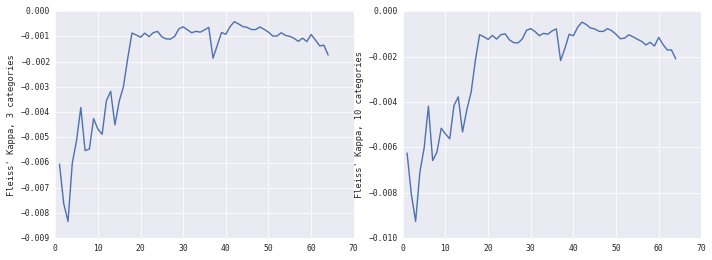

In [75]:
xlist = range(1, len(timelist))
plt.figure(figsize = (10,7))

plt.subplot(221)
plt.plot(xlist, kappas_3_categories)
plt.ylabel('Fleiss\' Kappa, 3 categories')
plt.subplot(222)

plt.plot(xlist, kappas_10_categories)
# plt.xticks(xlist, timelist, rotation=70, fontsize = 13)
# plt.xlim(xmax=65)
plt.tight_layout()
plt.ylabel('Fleiss\' Kappa, 10 categories')
plt.savefig('fleiss_kappa_3_10_categories.pdf', format = 'pdf')

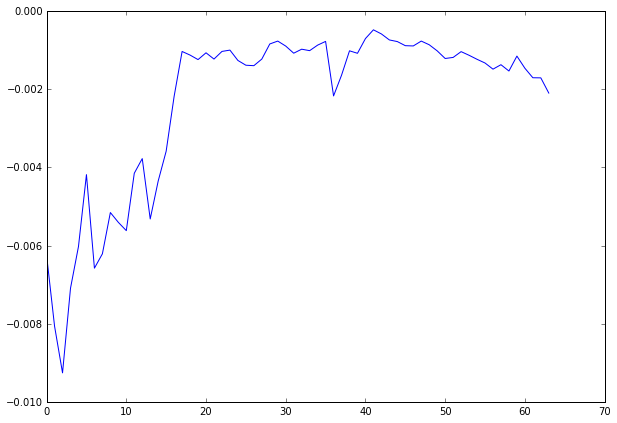

In [8]:
plt.figure(figsize = (10,7))
plt.plot(kappas_10_categories)

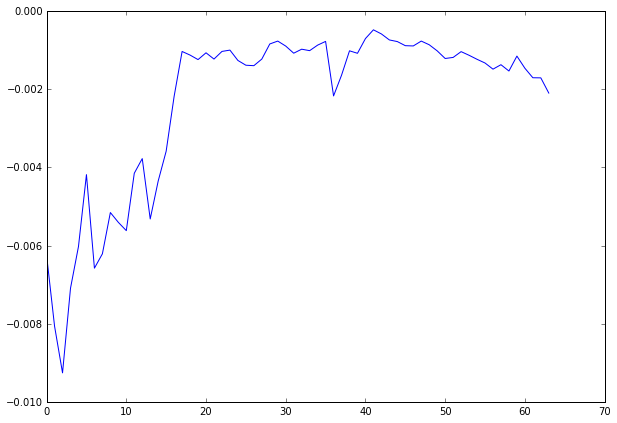

In [35]:
plt.figure(figsize = (10,7))
plt.plot(kappas_5_categories)

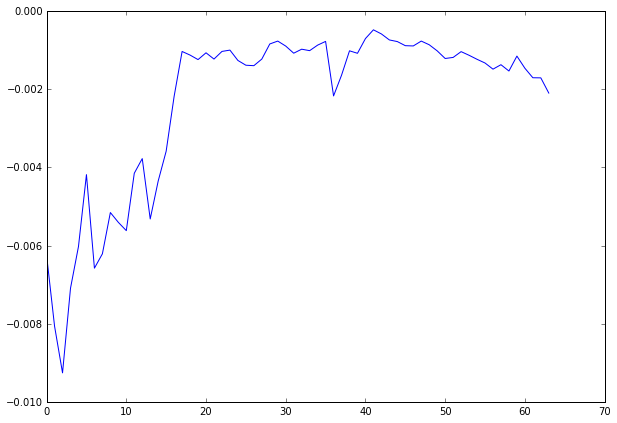

In [42]:
plt.figure(figsize = (10,7))
plt.plot(kappas_4_categories)

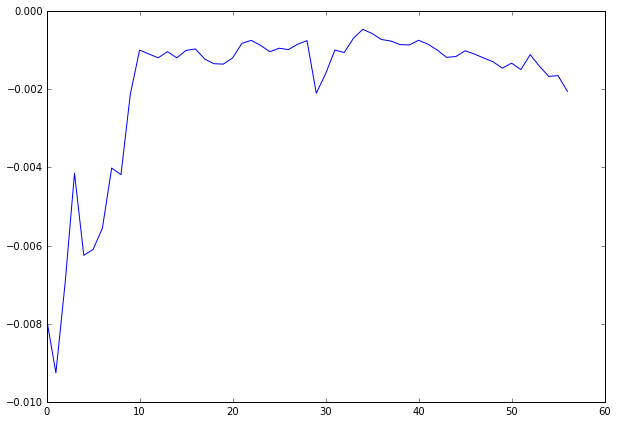

In [211]:
plt.figure(figsize = (10,7))
plt.plot(kappas_2_categories_labmit)

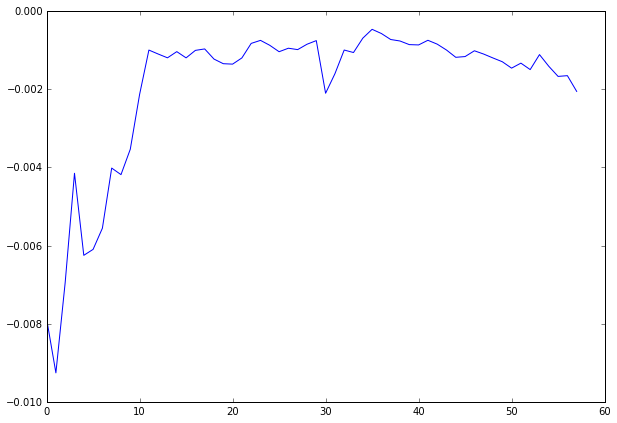

In [213]:
plt.figure(figsize = (10,7))
plt.plot(kappas_4_categories_labmit)

In [274]:
def pos_tag(text):
    return st.tag(text.strip().split(' '))

In [231]:
def get_pos_type(tagged_word):
    pos_tag = str(tagged_word[1])
    if 'JJ' in pos_tag:
        pos_type = 'adj'
    elif 'RB' in pos_tag:
        pos_type = 'adv'
    elif 'NN' in pos_tag:
        pos_type = 'noun'
    elif 'VB' in pos_tag:
        pos_type = 'verb'
    else: 
        pos_type = None
    return (tagged_word[0], pos_type)

In [278]:
def get_senti_score(word, pos):
    word = str(word.lower())
    word_stem = stemmer.stem(word)
    pos = str(pos)
    if pos == 'adj':
        score = adj.get(word, None)
        if score == None:
            score = adj.get(word_stem, None)
    elif pos == 'adv':
        score = adv.get(word, None)
        if score == None:
            score = adv.get(word_stem, None)
    elif pos == 'noun':
        score = noun.get(word, None)
        if score == None:
            score = noun.get(word_stem, None)
    elif pos == 'verb':
        score = verb.get(word, None)
        if score == None:
            score = verb.get(word_stem, None)
    else:
        score = inte.get(word, None)
        if score == None:
            score = inte.get(word_stem, None)
    return word, score

In [52]:
tag_scores = {}
for tag in tags_s_d:
    scores = []
    for word in tag.split(' '):
        try:
            word = word.lower()       
            scores.append(get_senti_score2(word))
        except:
            pass
    if scores != None:
        num_scores = len([i for i in scores if i != 0])
        ave_score = float(sum(scores))/num_scores if num_scores != 0 else None
        if ave_score is not None:
            tag_scores[tag] = ave_score

In [53]:
len(tag_scores)

2110

In [48]:
df_distinct = df.drop_duplicates('Title')

In [49]:
tags = df_distinct.Additional_Tags.tolist()

In [49]:
tags_s = []
for i in tags:
    tags_s1 = []
    j = str(i).split(',')
    for k in j:
        if 'Sherlock' in k:
            tags_s1.append(k)
    tags_s.append(tags_s1)
# with open ('/Users/jingy/Desktop/sherlock_tags_all2','a') as g:
#     for i in tags_s:
#         g.write(i)
#         g.write('\n')

In [50]:
tags_s = []
for i in tags:
    j = str(i).split(',')
    for k in j:
        if 'Sherlock' in k:
            tags_s.append(k)
tags_s_d = [i for i in tags_s if i != []]

In [319]:
len(tag_scores)

806

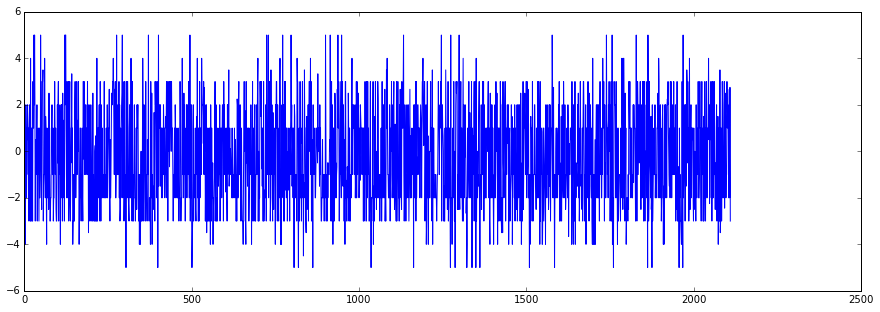

In [54]:
plt.figure(figsize = (15,5))
plt.plot(tag_scores.values())